In [25]:
import pymysql
connect = pymysql.connect(host='127.0.0.1',user = 'root',password='', db='arragement', charset='utf8')
cur = connect.cursor()
#%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

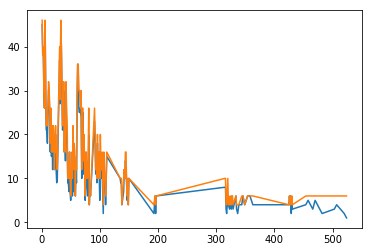

In [28]:
sql = "select lesson_id, sum(max_student), sum(actual_student)  from lesson_distribute where begin_at = '2018-01-24 19:20:00'  group by lesson_id order by lesson_id;"
cur.execute(sql)
data = cur.fetchall()
x = np.array([i[0] for i in data ])
ya = np.array([i[2] for i in data ])
ym = np.array([i[1] for i in data ])
plt.plot(x,ya,label="actual")
plt.plot(x,ym,label="max")
plt.show()

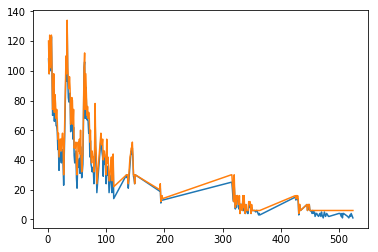

In [29]:
sql = "select lesson_id, sum(max_student),sum(actual_student) from lesson_distribute where date_format(begin_at, '%Y-%m-%d') = '2018-01-24'  group by lesson_id order by lesson_id; "
cur.execute(sql)
data = cur.fetchall()
x = np.array([i[0] for i in data ])
ya = np.array([i[2] for i in data ])
ym = np.array([i[1] for i in data ])
plt.plot(x,ya,label="actual")
plt.plot(x,ym,label="max")
plt.show()

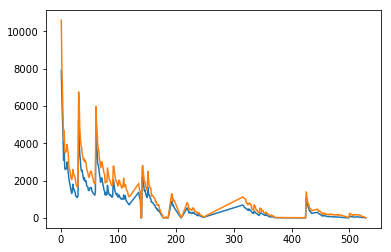

In [30]:
sql = "select lesson_id, sum(max_student),sum(actual_student) from lesson_distribute where date_format(begin_at, '%Y-%m') = '2018-01'  group by lesson_id order by lesson_id; "
cur.execute(sql)
data = cur.fetchall()
x = np.array([i[0] for i in data ])
ya = np.array([i[2] for i in data ])
ym = np.array([i[1] for i in data ])
plt.plot(x,ya,label="actual")
plt.plot(x,ym,label="max")
plt.show()

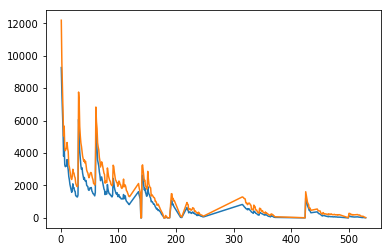

In [31]:
sql = "select lesson_id, sum(max_student),sum(actual_student) from lesson_distribute where date_format(begin_at, '%Y') = '2018'  group by lesson_id order by lesson_id; "
cur.execute(sql)
data = cur.fetchall()
x = np.array([i[0] for i in data ])
ya = np.array([i[2] for i in data ])
ym = np.array([i[1] for i in data ])
plt.plot(x,ya,label="actual")
plt.plot(x,ym,label="max")
plt.show()